In [8]:
import sys 
sys.path.append('../fsp')
import stochCalc
import numpy as np
import matplotlib.pyplot as plt

$dR(t) = (\alpha - \beta R(t)) dt + \sigma \sqrt{R(t)} dW(t)$

with $\beta = 1$, $\alpha = 0.10 \beta$, $r = 0.05$, $\sigma = 0.5$.

2A: 

Using the derivation from Q4:

$d log R = (\frac{1}{R} \tilde \alpha(t,R(t)) + \frac{1}{2} \frac{-1 }{V^2} \tilde \sigma(t, R(t))^2)dt + \frac{1}{R} \tilde \sigma(t, R(t)) dW(t)$

where $\tilde \alpha(t,R(t)) = (\alpha - \beta R(t))$ and $ \tilde \sigma(t, R(t)) = \sigma \sqrt{R(t)} $

$d log R = (\frac{1}{R} (\alpha - \beta R(t)) + \frac{1}{2} \frac{-1 }{V^2} (\sigma \sqrt{R(t)})^2)dt + \frac{1}{R} (\sigma \sqrt{R(t)}) dW(t)$


The number of Bad Path's Generated  5


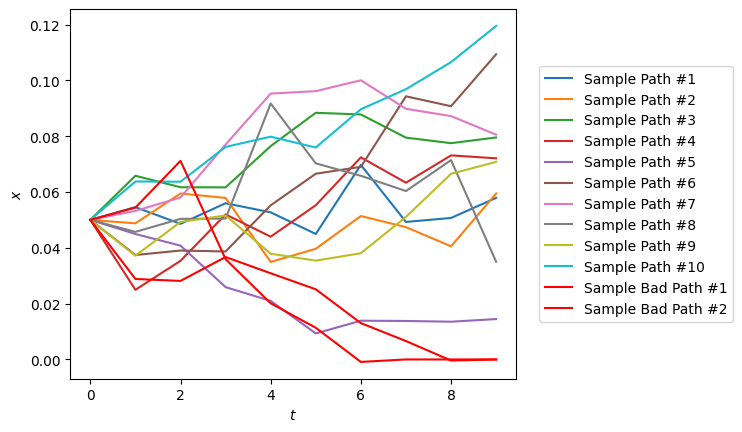

In [9]:
beta = 1
alpha = 0.10 * beta
sigma = 0.5
r = 0.05

def Beta(x : float) -> float:
    return alpha - (x * beta)

def Gamma(x : float) -> float:
    return sigma * np.sqrt(x)
fig, ax = plt.subplots()

cir = stochCalc.SDE(X0=r, lambda_t=0.01, N=10, Beta=Beta, Gamma=Gamma)
paths = cir.getValidPaths(M=1000, greaterThanZero=False)
path_summary = []

path_1 = []
path_2 = []
path_3 = []
path_4 = []
path_5 = []
path_6 = []
path_7 = []
path_8 = []
path_9 = []


for i, pather in enumerate(paths):
    path_1.append(pather[1])
    path_2.append(pather[2])
    path_3.append(pather[3])
    path_4.append(pather[4])
    path_5.append(pather[5])
    path_6.append(pather[6])
    path_7.append(pather[7])
    path_8.append(pather[8])
    path_9.append(pather[9])
    
    if i < 10:
        
        ax.plot(pather, label="Sample Path #" + str(i+1))
        ax.set_xlabel("$t$")
        ax.set_ylabel("$x$")

print("The number of Bad Path's Generated ", cir.badPathCounter)

for i, path in enumerate(cir.badPathsSample):
    if i < 2:
        ax.plot(path, c="r", label="Sample Bad Path #" + str(i+1))
        ax.set_xlabel("$t$")
        ax.set_ylabel("$x$")
        ax.legend()
    

pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))



In [10]:
paths_10 = [path_1, path_2, path_3, path_4, path_5, path_6,
            path_6, path_7, path_8, path_9]
stats_straight_mean = []
stats_straight_std = []
for i, index in enumerate(paths_10):
    print("The sample mean/std at time n=",str(i+1),  " is mean=",str(np.mean(index)), " and std=",np.std(index, ddof=1))
    stats_straight_mean.append(np.mean(index))
    stats_straight_std.append(np.std(index, ddof=1))

The sample mean/std at time n= 1  is mean= 0.05064769086086994  and std= 0.010982504829728191
The sample mean/std at time n= 2  is mean= 0.051067869985335114  and std= 0.015684999007464142
The sample mean/std at time n= 3  is mean= 0.051816151758099664  and std= 0.019377869220638298
The sample mean/std at time n= 4  is mean= 0.052436355759774025  and std= 0.022527368153713156
The sample mean/std at time n= 5  is mean= 0.053014000709109485  and std= 0.024408509316583362
The sample mean/std at time n= 6  is mean= 0.05382407015957144  and std= 0.02632859505223451
The sample mean/std at time n= 7  is mean= 0.05382407015957144  and std= 0.02632859505223451
The sample mean/std at time n= 8  is mean= 0.05440427469706755  and std= 0.028332681409224132
The sample mean/std at time n= 9  is mean= 0.05433694980951104  and std= 0.03025963818638892
The sample mean/std at time n= 10  is mean= 0.05510892564311226  and std= 0.03227547403806402


The number of Bad Path's Generated  540


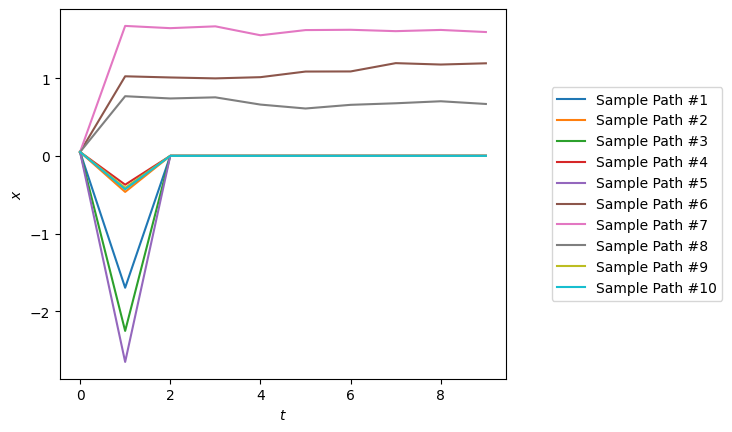

In [11]:
beta = 1
alpha = 0.10 * beta
sigma = 0.5
r = 0.05

def Beta_log(x : float) -> float:
    # return (1/np.log(x)) * (alpha - (np.log(x) * beta)) + (1/np.log(x)**2) * (1/2) * (sigma * np.log(x/2))**2
    return  (1/x * (alpha - beta * x) + 0.5 * (-1 / x**2) * sigma**2 * x)
def Gamma_log(x : float) -> float:
    # return (1/np.log(x)) * (sigma * np.log(x/2))
    return 1/x * sigma
fig, ax = plt.subplots()

cir = stochCalc.SDE(X0=r, lambda_t=0.01, N=10, Beta=Beta_log, Gamma=Gamma_log)
paths = cir.getValidPaths(M=1000, greaterThanZero=False, stopBelowZero=True)
path_summary = []

path_1 = []
path_2 = []
path_3 = []
path_4 = []
path_5 = []
path_6 = []
path_7 = []
path_8 = []
path_9 = []


for i, pather in enumerate(paths):
    path_1.append(pather[1])
    path_2.append(pather[2])
    path_3.append(pather[3])
    path_4.append(pather[4])
    path_5.append(pather[5])
    path_6.append(pather[6])
    path_7.append(pather[7])
    path_8.append(pather[8])
    path_9.append(pather[9])
    
    if i < 10:
        
        ax.plot(pather, label="Sample Path #" + str(i+1))
        ax.set_xlabel("$t$")
        ax.set_ylabel("$x$")

print("The number of Bad Path's Generated ", cir.badPathCounter)

pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))

In [12]:
paths_10 = [path_1, path_2, path_3, path_4, path_5, path_6,
            path_6, path_7, path_8, path_9]
stats_log_mean = []
stats_log_std = []

for i, index in enumerate(paths_10):
    print("The sample mean/std at time n=",str(i+1),  " is mean=",str(np.mean(index)), " and std=",np.std(index, ddof=1))
    stats_log_mean.append(np.mean(index))
    stats_log_std.append(np.std(index, ddof=1))

The sample mean/std at time n= 1  is mean= 0.08568496590922804  and std= 1.0454536927823668
The sample mean/std at time n= 2  is mean= 0.09781547119249169  and std= 10.533562384465002
The sample mean/std at time n= 3  is mean= 0.46439407687884604  and std= 0.6458209833303827
The sample mean/std at time n= 4  is mean= 0.4793192058480151  and std= 0.7748490991685784
The sample mean/std at time n= 5  is mean= 0.4716856307474992  and std= 0.7755453781657307
The sample mean/std at time n= 6  is mean= 0.48149108219120806  and std= 0.7755122875770258
The sample mean/std at time n= 7  is mean= 0.48149108219120806  and std= 0.7755122875770258
The sample mean/std at time n= 8  is mean= 0.47879551814257565  and std= 0.7812617583092013
The sample mean/std at time n= 9  is mean= 0.47920933278590694  and std= 0.7748754304716571
The sample mean/std at time n= 10  is mean= 0.47689740577545303  and std= 0.772748184541736


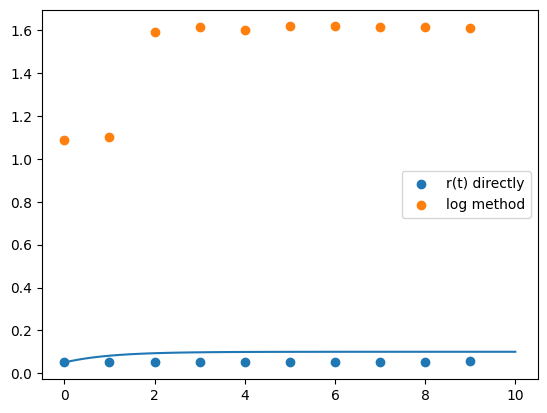

In [13]:
#graph this line
def rt_mean(x):
    return np.exp(-beta * x)*r + (alpha/beta) * (1-np.exp(-beta * x))
def rt_var(x):
    return ((sigma**2) / beta) * r * (np.exp(-beta * x) - np.exp(-2 * beta * x)) + ((alpha * sigma**2)/2 * beta**2) * (1-2*np.exp(-2*beta*x) - np.exp(-2*beta*x))

x_vals = np.linspace(0,10,100)

plt.plot(x_vals, rt_mean(x_vals))
plt.scatter(range(0,10), stats_straight_mean, label="r(t) directly")
plt.scatter(range(0,10), np.exp(stats_log_mean), label="log method")
plt.legend()

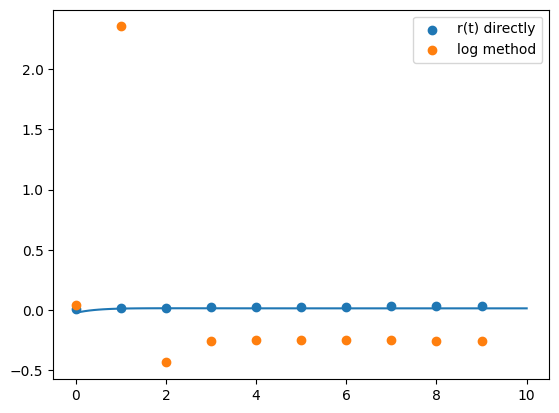

In [14]:
plt.plot(x_vals, rt_var(x_vals))
plt.scatter(range(0,10), stats_straight_std, label="r(t) directly")
plt.scatter(range(0,10), np.log(stats_log_std), label="log method")
plt.legend()